# Weight Divergence Analysis

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

from plot.model_comparisons import group_statistics_by_address, print_grouped_statistics

In [2]:
COMPARISON_LLAMA_SPROG = '../outputs/comparison-weights-llama2-sprogmodel-12500.json'
COMPARISON_LLAMA_SNAK = '../outputs/comparison-weights-llama2-snakmodel-12500.json'
COMPARISON_SPROG_SNAK = '../outputs/comparison-weights-sprogmodel-snakmodel-12500.json'
# across training
COMPARISON_LLAMA_SPROG_ALL = '../outputs/comparison-weights-llama2-sprogmodel.json'

## LLaMA-2 <-> SprogModel

In [3]:
# load comparison statistics
with open(COMPARISON_LLAMA_SPROG) as fp:
    comparisons = json.load(fp)
print(f"Loaded metrics from {len(comparisons)} comparison(s).")

comparison, parameters = next(iter(comparisons.items()))
print('-'*len(comparison))
print(f"{comparison}")
print('-' * len(comparison))

# statistics per layer
print("Aggregated Layer Statistics:")
layer_metrics = group_statistics_by_address(parameters, lambda a: f'layer_{a[2]}' if a[1] == 'layers' else a[1])
print_grouped_statistics(layer_metrics)

# statistics per parameter-type
print("Aggregated Parameter-type Statistics:")
ptype_metrics = group_statistics_by_address(parameters, lambda a: a[-2])
print_grouped_statistics(ptype_metrics)

Loaded metrics from 1 comparison(s).
-----------------------------------------------------------------------------
meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_12500
-----------------------------------------------------------------------------
Aggregated Layer Statistics:
    embed_tokens: {'delta': 0.0010418402962386608, 'ssa': 4.421687602996826}
    layer_0: {'delta': 0.0008563216348799566, 'ssa': 1.5936559606509815}
    layer_1: {'delta': 0.0012100330140027734, 'ssa': 1.46263424188198}
    layer_2: {'delta': 0.0013969119301893646, 'ssa': 1.3900995428557508}
    layer_3: {'delta': 0.001368113133745889, 'ssa': 1.4753826196559072}
    layer_4: {'delta': 0.0013911269682769973, 'ssa': 1.474580449467924}
    layer_5: {'delta': 0.001388283342950874, 'ssa': 1.4475876093763094}
    layer_6: {'delta': 0.0014531783268062605, 'ssa': 1.4518593152003763}
    layer_7: {'delta': 0.0013993894293283422, 'ssa': 1.4486118779210042}
    layer_8: {'delta': 0.0014053014520969656

In [4]:
def plot_grouped_metrics(grouped_metrics, metric='ssa', reduction=np.mean, x_label=None, y_label=None, x_tick_labels=None, output=None):
	# prepare data
	angles = []
	for group, metrics in grouped_metrics.items():
		if metric not in metrics:
			print(f"[Warning] No '{metric}' available for '{group}'. Skipped.")
			continue
		angles.append(metrics[metric])
	
	angles_reduced = [reduction(a) for a in angles]
	x_values = np.arange(len(angles))
	
	fig, ax = plt.subplots(figsize=(6.3 * .7, 6.3 * .3))
	
	ax.set_xlabel(x_label, alpha=.6)
	if x_tick_labels:
		ax.set_xticks(np.arange(len(x_tick_labels)), x_tick_labels)
	else:
		ax.set_xticks(np.arange(0, max(x_values), 4))
	ax.set_xlim(min(x_values)-1, max(x_values)+1)
	ax.set_ylabel(y_label, alpha=.6)
	
	bars = ax.bar(x_values, angles_reduced, color='lightcoral')
	bars[0].set_color('firebrick')
	bars[-1].set_color('firebrick')
	
	caption = 'Screenreader Caption: ' + ', '.join(f'{g}: {v}' for g, v in zip(grouped_metrics, angles_reduced))
	
	# add grid
	ax.grid(linestyle=':', linewidth=1)
	ax.set_axisbelow(True)
	
	fig.tight_layout()

	if output is not None:
		plt.savefig(output, bbox_inches='tight', pad_inches=.05)
		with open(output + '.txt', 'w') as fp:
			fp.write(caption)

	plt.show()

### Layer-wise SSAs

[Warning] No 'ssa' available for 'norm'. Skipped.


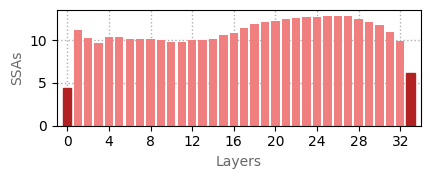

In [5]:
layer_metrics = group_statistics_by_address(parameters, lambda a: f'layer_{a[2]}' if a[1] == 'layers' else a[1], reduce=False)
plot_grouped_metrics(layer_metrics, reduction=np.sum, x_label='Layers', y_label='SSAs', output='../outputs/comparison-weights-llama2-sprogmodel-12500-layers.pdf')

### Parameter-wise SSAs

[Warning] No 'ssa' available for 'input_layernorm'. Skipped.
[Warning] No 'ssa' available for 'post_attention_layernorm'. Skipped.
[Warning] No 'ssa' available for 'norm'. Skipped.


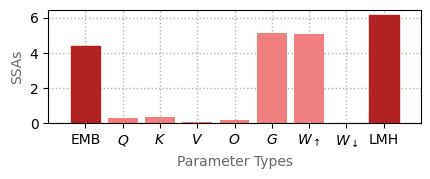

In [6]:
ptype_metrics = group_statistics_by_address(parameters, lambda a: a[-2], reduce=False)
parameter_types = ['EMB', '$Q$', '$K$', '$V$', '$O$', '$G$', r'$W_\uparrow$', r'$W_\downarrow$', 'LMH']
plot_grouped_metrics(ptype_metrics, reduction=np.mean, x_label='Parameter Types', y_label='SSAs', x_tick_labels=parameter_types, output='../outputs/comparison-weights-llama2-sprogmodel-12500-parameters.pdf')

### Parameter Divergence over Time

In [14]:
# load comparison statistics across training
with open(COMPARISON_LLAMA_SPROG_ALL) as fp:
    comparisons = json.load(fp)
print(f"Loaded metrics from {len(comparisons)} comparison(s).")

Loaded metrics from 25 comparison(s).


In [16]:
print(comparisons.keys())

dict_keys(['meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_1000/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_1500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_2000/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_2500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_3000/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_3500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_4000/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_4500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_5000/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_5500/', 'meta-llama/Llama-2-7b-hf<->/data/sprogmodel/hf_model_exports/checkpoint_6000/', 'meta-llama/Llama-

In [100]:
def plot_grouped_metrics_timeseries(comparisons, grouper, group_names, metric='ssa', reduction=np.mean, y_label=None, output=None):
	# prepare data
	angles = []
	steps = []
	for comparison, parameters in comparisons.items():
		angles.append([])
		steps.append(int(comparison.split('_')[-1][:-1]))
		grouped_metrics = group_statistics_by_address(parameters, grouper, reduce=False)
		for group, metrics in grouped_metrics.items():
			if metric not in metrics:
				# print(f"[Warning] No '{metric}' available for '{group}'. Skipped.")
				continue
			angles[-1].append(metrics[metric])
	
	# add step 0
	angles.insert(0, [[0 for _ in group_angles] for group_angles in angles[0]])
	steps.insert(0, 0)
	
	angles_reduced = np.array([[reduction(group_angles) for group_angles in timestep] for timestep in angles])
	angles_stddevs = np.array([[np.std(group_angles) for group_angles in timestep] for timestep in angles])
	x_values = steps
	
	fig, ax = plt.subplots(figsize=(6.3 * 1.4, 6.3 * .5))
	
	ax.set_xlabel('Steps', alpha=.6)
	ax.set_xlim(min(x_values), max(x_values))
	ax.set_xticks(np.arange(min(x_values), max(x_values), 1000))
	ax.set_ylabel(y_label, alpha=.6)
	
	colors = ['lightcoral', 'lightsteelblue', 'cornflowerblue', 'steelblue', 'slateblue', 'darkseagreen', 'olivedrab', 'forestgreen', 'firebrick']
	markers = ['v', 'o', 'P', 's', 'D', 'X', '<', '>', '^']
	for group_idx in range(angles_reduced.shape[1]):
		ax.plot(x_values, angles_reduced[:, group_idx], color=colors[group_idx], marker=markers[group_idx], alpha=.6, label=group_names[group_idx])
		ax.fill_between(
			x_values, angles_reduced[:, group_idx] - angles_stddevs[:, group_idx], angles_reduced[:, group_idx] + angles_stddevs[:, group_idx],
			color=colors[group_idx], linewidth=1, linestyle='dashed', alpha=.15
		)
	
	caption = 'Screenreader Caption: ' + '. '.join(f'At step {s}: ' + ', '.join(f'{g}: {v}' for g, v in zip(group_names, ar)) for s, ar in zip(steps, angles_reduced))
	
	# add grid
	ax.grid(linestyle=':', linewidth=1)
	ax.set_axisbelow(True)
	
	# add legend
	# box = ax.get_position()
	# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
	# ax.legend(loc='center left', bbox_to_anchor=(1, .5))
	box = ax.get_position()
	ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
	ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=9)
	
	fig.tight_layout()

	if output is not None:
		plt.savefig(output, bbox_inches='tight', pad_inches=.05)
		with open(output + '.txt', 'w') as fp:
			fp.write(caption)

	plt.show()

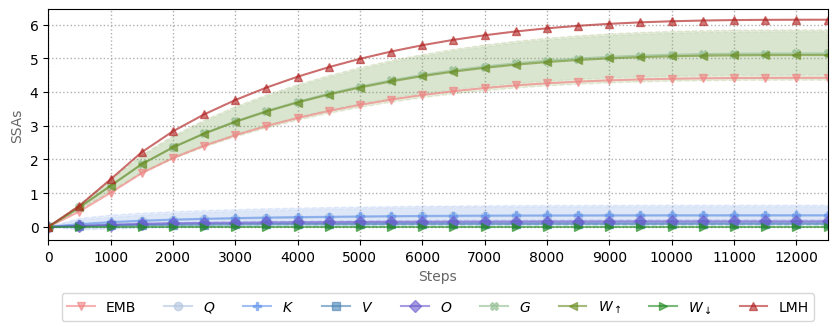

In [101]:
ptype_metrics = group_statistics_by_address(parameters, lambda a: a[-2], reduce=False)
parameter_types = ['EMB', '$Q$', '$K$', '$V$', '$O$', '$G$', r'$W_\uparrow$', r'$W_\downarrow$', 'LMH']
plot_grouped_metrics_timeseries(comparisons, grouper=lambda a: a[-2], group_names=parameter_types, reduction=np.mean, y_label='SSAs', output='../outputs/comparison-weights-llama2-sprogmodel-parameters.pdf')

## LLaMA-2 <-> SnakModel

In [8]:
# load comparison statistics
with open(COMPARISON_LLAMA_SNAK) as fp:
    comparisons = json.load(fp)
comparison, parameters = next(iter(comparisons.items()))
print(f"Loaded metrics from {len(comparisons)} comparison(s).")

Loaded metrics from 1 comparison(s).


[Warning] No 'ssa' available for 'norm'. Skipped.


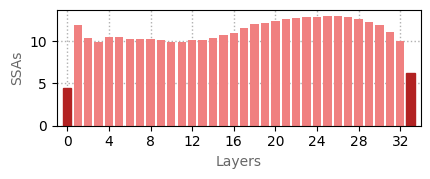

In [9]:
layer_metrics = group_statistics_by_address(parameters, lambda a: f'layer_{a[2]}' if a[1] == 'layers' else a[1], reduce=False)
plot_grouped_metrics(layer_metrics, reduction=np.sum, x_label='Layers', y_label='SSAs', output='../outputs/comparison-weights-llama2-snakmodel-12500-layers.pdf')

[Warning] No 'ssa' available for 'input_layernorm'. Skipped.
[Warning] No 'ssa' available for 'post_attention_layernorm'. Skipped.
[Warning] No 'ssa' available for 'norm'. Skipped.


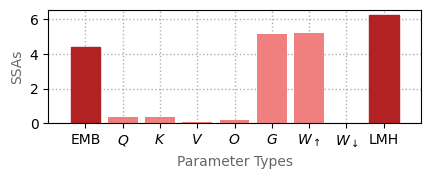

In [10]:
ptype_metrics = group_statistics_by_address(parameters, lambda a: a[-2], reduce=False)
parameter_types = ['EMB', '$Q$', '$K$', '$V$', '$O$', '$G$', r'$W_\uparrow$', r'$W_\downarrow$', 'LMH']
plot_grouped_metrics(ptype_metrics, reduction=np.mean, x_label='Parameter Types', y_label='SSAs', x_tick_labels=parameter_types, output='../outputs/comparison-weights-llama2-snakmodel-12500-parameters.pdf')

## SnakModel <-> SprogModel

In [11]:
# load comparison statistics
with open(COMPARISON_SPROG_SNAK) as fp:
    comparisons = json.load(fp)
comparison, parameters = next(iter(comparisons.items()))
print(f"Loaded metrics from {len(comparisons)} comparison(s).")

Loaded metrics from 1 comparison(s).


[Warning] No 'ssa' available for 'norm'. Skipped.


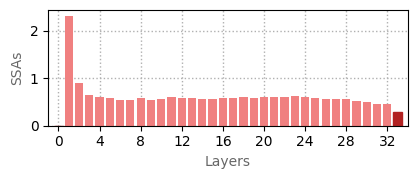

In [12]:
layer_metrics = group_statistics_by_address(parameters, lambda a: f'layer_{a[2]}' if a[1] == 'layers' else a[1], reduce=False)
plot_grouped_metrics(layer_metrics, reduction=np.sum, x_label='Layers', y_label='SSAs', output='../outputs/comparison-weights-sprogmodel-snakmodel-12500-layers.pdf')

[Warning] No 'ssa' available for 'input_layernorm'. Skipped.
[Warning] No 'ssa' available for 'post_attention_layernorm'. Skipped.
[Warning] No 'ssa' available for 'norm'. Skipped.


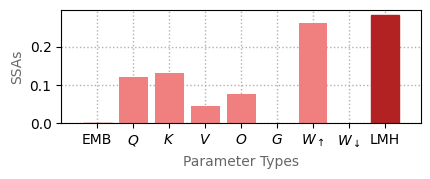

In [13]:
ptype_metrics = group_statistics_by_address(parameters, lambda a: a[-2], reduce=False)
parameter_types = ['EMB', '$Q$', '$K$', '$V$', '$O$', '$G$', r'$W_\uparrow$', r'$W_\downarrow$', 'LMH']
plot_grouped_metrics(ptype_metrics, reduction=np.mean, x_label='Parameter Types', y_label='SSAs', x_tick_labels=parameter_types, output='../outputs/comparison-weights-sprogmodel-snakmodel-12500-parameters.pdf')